In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw
import rasterio.features
import shapely.geometry
import os
from os import listdir
from os.path import isfile, join
import tifffile as tiff
import json
import pdb
import copy
import shutil
from scipy.spatial import ConvexHull
import re

Copy into drive

In [3]:
mypath = r"C:\Users\Luka\Desktop\PFP\test\labels"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles = [f for f in onlyfiles if "_pre_disaster.json" in f or "_post_disaster.json" in f]
# onlyfiles = [f for f in onlyfiles if "fire" in f]
len(onlyfiles)

1866

In [11]:
df = pd.DataFrame(onlyfiles).rename(columns={0:"img_pre"})
df["mask_pre"] = df["img_pre"]
df["img_post"] = df["img_pre"]
df["mask_post"] = df["img_pre"]
df

,img_pre,mask_pre,img_post,mask_post
0,hurricane-matthew_00000010_post_disaster.txt,hurricane-matthew_00000010_post_disaster.txt,hurricane-matthew_00000010_post_disaster.txt,hurricane-matthew_00000010_post_disaster.txt
1,hurricane-matthew_00000011_post_disaster.txt,hurricane-matthew_00000011_post_disaster.txt,hurricane-matthew_00000011_post_disaster.txt,hurricane-matthew_00000011_post_disaster.txt
2,hurricane-matthew_00000018_post_disaster.txt,hurricane-matthew_00000018_post_disaster.txt,hurricane-matthew_00000018_post_disaster.txt,hurricane-matthew_00000018_post_disaster.txt
3,hurricane-matthew_00000019_post_disaster.txt,hurricane-matthew_00000019_post_disaster.txt,hurricane-matthew_00000019_post_disaster.txt,hurricane-matthew_00000019_post_disaster.txt
4,hurricane-matthew_00000022_post_disaster.txt,hurricane-matthew_00000022_post_disaster.txt,hurricane-matthew_00000022_post_disaster.txt,hurricane-matthew_00000022_post_disaster.txt
...,...,...,...,...
627,socal-fire_00001378_post_disaster.txt,socal-fire_00001378_post_disaster.txt,socal-fire_00001378_post_disaster.txt,socal-fire_00001378_post_disaster.txt
628,socal-fire_00001384_post_disaster.txt,socal-fire_00001384_post_disaster.txt,socal-fire_00001384_post_disaster.txt,socal-fire_00001384_post_disaster.txt
629,socal-fire_00001388_post_disaster.txt,socal-fire_00001388_post_disaster.txt,socal-fire_00001388_post_disaster.txt,socal-fire_00001388_post_disaster.txt
630,socal-fire_00001395_post_disaster.txt,socal-fire_00001395_post_disaster.txt,socal-fire_00001395_post_disaster.txt,socal-fire_00001395_post_disaster.txt


In [12]:
df['img_pre'].replace('post','pre',inplace=True,regex=True)
df['img_pre'].replace('txt','png',inplace=True,regex=True)

df['mask_pre'].replace('post','pre',inplace=True,regex=True)
df['mask_pre'].replace('.txt','_target.png',inplace=True,regex=True)

df['img_post'].replace('txt','png',inplace=True,regex=True)

df['mask_post'].replace('.txt','_target.png',inplace=True,regex=True)

df

,img_pre,mask_pre,img_post,mask_post
0,hurricane-matthew_00000010_pre_disaster.png,hurricane-matthew_00000010_pre_disaster_target...,hurricane-matthew_00000010_post_disaster.png,hurricane-matthew_00000010_post_disaster_targe...
1,hurricane-matthew_00000011_pre_disaster.png,hurricane-matthew_00000011_pre_disaster_target...,hurricane-matthew_00000011_post_disaster.png,hurricane-matthew_00000011_post_disaster_targe...
2,hurricane-matthew_00000018_pre_disaster.png,hurricane-matthew_00000018_pre_disaster_target...,hurricane-matthew_00000018_post_disaster.png,hurricane-matthew_00000018_post_disaster_targe...
3,hurricane-matthew_00000019_pre_disaster.png,hurricane-matthew_00000019_pre_disaster_target...,hurricane-matthew_00000019_post_disaster.png,hurricane-matthew_00000019_post_disaster_targe...
4,hurricane-matthew_00000022_pre_disaster.png,hurricane-matthew_00000022_pre_disaster_target...,hurricane-matthew_00000022_post_disaster.png,hurricane-matthew_00000022_post_disaster_targe...
...,...,...,...,...
627,socal-fire_00001378_pre_disaster.png,socal-fire_00001378_pre_disaster_target.png,socal-fire_00001378_post_disaster.png,socal-fire_00001378_post_disaster_target.png
628,socal-fire_00001384_pre_disaster.png,socal-fire_00001384_pre_disaster_target.png,socal-fire_00001384_post_disaster.png,socal-fire_00001384_post_disaster_target.png
629,socal-fire_00001388_pre_disaster.png,socal-fire_00001388_pre_disaster_target.png,socal-fire_00001388_post_disaster.png,socal-fire_00001388_post_disaster_target.png
630,socal-fire_00001395_pre_disaster.png,socal-fire_00001395_pre_disaster_target.png,socal-fire_00001395_post_disaster.png,socal-fire_00001395_post_disaster_target.png


In [13]:
df.to_csv("dataset1_csv_test.csv", index=False)

In [48]:
for file in onlyfiles:
    shutil.copyfile(mypath+"\\"+file, mypath.replace("test5","test9")+"\\"+file)

In [5]:
for file in onlyfiles:
    shutil.copyfile(mypath+"\\"+file, mypath.replace("test\labels","todrive")+"\\"+file)

In [5]:
#creating .txt files for training image paths for Yolo
with open("testingimages.txt", 'w') as f:
    for file in onlyfiles:
        f.write("/content/drive/MyDrive/natural_catastroph_folder/testing_dataset/images/")
        f.write(file.replace(".txt",".png"))
        f.write("\n")

##### TESTS

In [4]:
path = str(os.getcwd())+"\train\images\\"
path

'C:\\Users\\Luka\\Desktop\\PFP\train\\images\\'

In [ ]:
for i in range(5):
#     print(os.listdir(path)[i])
    plt.figure(figsize=(15, 15))
    imArr = tiff.imread(path+os.listdir(path)[i])
    print(path+os.listdir(path)[i])
    plt.imshow(imArr, interpolation='nearest')
    plt.show()

In [ ]:
a = tiff.imread(r'C:\\Users\\Luka\\Desktop\\PFP\\geotiffs\\tier1\\images\\mexico-earthquake_00000079_post_disaster.tif')
print(a.shape)
print(type(a))
np.sum(np.count_nonzero(a, axis=2)==0)/(1024*1024)

In [ ]:
plt.figure(figsize=(15, 15))
plt.imshow(a , interpolation='nearest')
plt.show()

In [7]:
a = np.array([[[0, 0, 0],
              [3, 5, 2],
              [3, 5, 2],
              [3, 5, 2]],
             [[0, 0, 0],
              [3, 5, 2],
              [3, 5, 2],
              [3, 5, 2]]])
np.count_nonzero(a, axis=2)

array([[0, 3, 3, 3],
       [0, 3, 3, 3]], dtype=int64)

In [8]:
jsonPath = r"C:\Users\Luka\Desktop\PFP\train\labels\guatemala-volcano_00000002_post_disaster.json"
with open(jsonPath,"r") as mj:
    js = json.load(mj)
js["features"]["xy"]

[{'properties': {'feature_type': 'building',
   'subtype': 'destroyed',
   'uid': 'ef81591e-659f-430b-ad80-90aa5a493874'},
  'wkt': 'POLYGON ((1023.482608182874 334.6244580135142, 999.4196361411828 310.8333628270524, 1000.017245870696 309.9588702593426, 983.3680623757418 295.6881415473502, 1001.602882393618 272.300002825116, 1004.179541745681 275.0748667408224, 1010.918496970355 268.1377069506068, 1001.008268699362 258.4256832446848, 1006.16158739969 254.2633873692261, 1000.611859568038 248.3172504067268, 995.2603363002684 253.4705691070531, 987.3321536828095 245.1459773580347, 991.6926541216759 239.5962495266219, 1001.404677829025 230.0824303857684, 1008.341837622565 236.2267719128614, 1011.909519795935 232.4608851703883, 1016.666429367075 237.217794742002, 1020.035906981311 233.8483171291911, 1023.482535903457 237.4672775490528, 1023.482608182874 334.6244580135142))'}]

In [9]:
js["features"]["xy"][0]["wkt"].replace("POLYGON ","").replace(", ",",")[2:-2].split(',')

['1023.482608182874 334.6244580135142',
 '999.4196361411828 310.8333628270524',
 '1000.017245870696 309.9588702593426',
 '983.3680623757418 295.6881415473502',
 '1001.602882393618 272.300002825116',
 '1004.179541745681 275.0748667408224',
 '1010.918496970355 268.1377069506068',
 '1001.008268699362 258.4256832446848',
 '1006.16158739969 254.2633873692261',
 '1000.611859568038 248.3172504067268',
 '995.2603363002684 253.4705691070531',
 '987.3321536828095 245.1459773580347',
 '991.6926541216759 239.5962495266219',
 '1001.404677829025 230.0824303857684',
 '1008.341837622565 236.2267719128614',
 '1011.909519795935 232.4608851703883',
 '1016.666429367075 237.217794742002',
 '1020.035906981311 233.8483171291911',
 '1023.482535903457 237.4672775490528',
 '1023.482608182874 334.6244580135142']

In [10]:
[tuple(map(np.float64,coordStr.split())) for coordStr in js["features"]["xy"][0]["wkt"].replace("POLYGON ","").replace(", ",",")[2:-2].split(',')]

[(1023.482608182874, 334.6244580135142),
 (999.4196361411828, 310.8333628270524),
 (1000.017245870696, 309.9588702593426),
 (983.3680623757418, 295.6881415473502),
 (1001.602882393618, 272.300002825116),
 (1004.179541745681, 275.0748667408224),
 (1010.918496970355, 268.1377069506068),
 (1001.008268699362, 258.4256832446848),
 (1006.16158739969, 254.2633873692261),
 (1000.611859568038, 248.3172504067268),
 (995.2603363002684, 253.4705691070531),
 (987.3321536828095, 245.1459773580347),
 (991.6926541216759, 239.5962495266219),
 (1001.404677829025, 230.0824303857684),
 (1008.341837622565, 236.2267719128614),
 (1011.909519795935, 232.4608851703883),
 (1016.666429367075, 237.217794742002),
 (1020.035906981311, 233.8483171291911),
 (1023.482535903457, 237.4672775490528),
 (1023.482608182874, 334.6244580135142)]

# Preprocess

### Save a new json file for each image with coordinates that are stored as a list of tuples

#### each js["features"] dict has to keys: 'xy' and 'lng_lat'
#### we are just interested about xy (for now) which are relative to the image and not to  Earth 

In [61]:
for folder in ["hold","test","tier1","tier3"]:
    mypath = r"C:\Users\Luka\Desktop\PFP\geotiffs\{}\labels".format(folder)
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    onlyfiles = [f for f in onlyfiles if "disaster.json" in f]

    for jsFile in onlyfiles:

        with open(mypath+"\\"+jsFile,"r") as mj:
            js = json.load(mj)

        for i, buildingJson in enumerate(js["features"]["xy"]):
            js["features"]["xy"][i]["wkt"] = [tuple(map(np.float64,coordStr.split())) for coordStr in buildingJson["wkt"].replace("POLYGON ","").replace(", ",",")[2:-2].split(',')]
   
        #adding the new json file into the folder
        with open(mypath+"\\"+jsFile.replace(".json","")+"_coordsList.json","w") as yj:
            json.dump(js,yj)

In [11]:
#small dataset
for folder in ["hold"]:
    mypath = r"C:\Users\Luka\Desktop\PFP\{}\labels".format(folder)
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    onlyfiles = [f for f in onlyfiles if "disaster.json" in f]

    for jsFile in onlyfiles:

        with open(mypath+"\\"+jsFile,"r") as mj:
            js = json.load(mj)

        for i, buildingJson in enumerate(js["features"]["xy"]):
            js["features"]["xy"][i]["wkt"] = [tuple(map(np.float64,coordStr.split())) for coordStr in buildingJson["wkt"].replace("POLYGON ","").replace(", ",",")[2:-2].split(',')]
            
        #adding the new json file into the folder
        with open(mypath+"\\"+jsFile.replace(".json","")+"_coordsList.json","w") as yj:
            json.dump(js,yj)

##### Check extreme pixel values (located in js["features"]["xy"])

In [15]:
strangePixelBuildings = 0
normalBuildings = 0
extremeValues = []

for folder in ["train","test","hold"]:
    mypath = r"C:\Users\Luka\Desktop\PFP\{}\labels".format(folder)
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    onlyfiles = [f for f in onlyfiles if "_coordsList.json" in f]
    onlyfiles = [f for f in onlyfiles if "_pre" not in f]
    
    for jsFile in onlyfiles:

        with open(mypath+"\\"+jsFile,"r") as mj:
            js = json.load(mj)

        for buildingJson in js["features"]["xy"]:
            
            for coords in buildingJson["wkt"]:
                
                if ( min(coords) < 0 ):
                    extremeValues.append(min(coords))
                    strangePixelBuildings += 1
                elif ( max(coords) > 1024 ):
                    extremeValues.append(max(coords))
                    strangePixelBuildings += 1
                else:
                    normalBuildings += 1
                    
print(strangePixelBuildings)
print(normalBuildings)
print((strangePixelBuildings*100)/(normalBuildings+strangePixelBuildings))

10536
2625590
0.3996774054047492


In [16]:
print(min(extremeValues), max(extremeValues))

-0.3594932836741975 1024.055575674362


[[1, 20], [-13, 40], [15, 22], [12, 18], [-20, 4], [5, 15]]
[[17.35241635687732, 34.09814126394052], [10.352416356877317, -1.9018587360594827], [-20.000000000000004, 4.000000000000001], [-12.999999999999996, 40.00000000000001]]


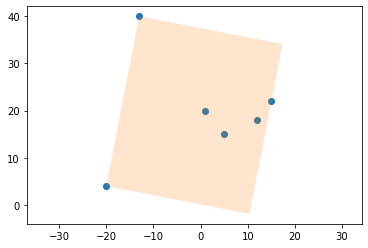

In [19]:
import matplotlib.pyplot as plt
for n in range(1):
    points = np.random.rand(9,2)
    points = np.array([[1, 20], [-13, 40], [15, 22], [12, 18], [-20, 4], [5, 15]])
    print(points.tolist())
    plt.scatter(points[:,0], points[:,1])
    bbox = minimum_bounding_rectangle(points)
    print(bbox.tolist())
    plt.fill(bbox[:,0], bbox[:,1], alpha=0.2)
    plt.axis('equal')
    plt.show()

In [3]:
#smallest surrounding rectangle
def minimum_bounding_rectangle(points):
    """
    Find the smallest bounding rectangle for a set of points.
    Returns a set of points representing the corners of the bounding box.

    :param points: an nx2 matrix of coordinates
    :rval: an nx2 matrix of coordinates
    """
    from scipy.ndimage import rotate
    pi2 = np.pi/2.

    # get the convex hull for the points
    hull_points = points[ConvexHull(points).vertices]

    # calculate edge angles
    edges = np.zeros((len(hull_points)-1, 2))
    edges = hull_points[1:] - hull_points[:-1]

    angles = np.zeros((len(edges)))
    angles = np.arctan2(edges[:, 1], edges[:, 0])

    angles = np.abs(np.mod(angles, pi2))
    angles = np.unique(angles)

    # find rotation matrices
    # XXX both work
    rotations = np.vstack([
        np.cos(angles),
        np.cos(angles-pi2),
        np.cos(angles+pi2),
        np.cos(angles)]).T
#     rotations = np.vstack([
#         np.cos(angles),
#         -np.sin(angles),
#         np.sin(angles),
#         np.cos(angles)]).T
    rotations = rotations.reshape((-1, 2, 2))

    # apply rotations to the hull
    rot_points = np.dot(rotations, hull_points.T)

    # find the bounding points
    min_x = np.nanmin(rot_points[:, 0], axis=1)
    max_x = np.nanmax(rot_points[:, 0], axis=1)
    min_y = np.nanmin(rot_points[:, 1], axis=1)
    max_y = np.nanmax(rot_points[:, 1], axis=1)

    # find the box with the best area
    areas = (max_x - min_x) * (max_y - min_y)
    best_idx = np.argmin(areas)

    # return the best box
    x1 = max_x[best_idx]
    x2 = min_x[best_idx]
    y1 = max_y[best_idx]
    y2 = min_y[best_idx]
    r = rotations[best_idx]

    rval = np.zeros((4, 2))
    rval[0] = np.dot([x1, y2], r)
    rval[1] = np.dot([x2, y2], r)
    rval[2] = np.dot([x2, y1], r)
    rval[3] = np.dot([x1, y1], r)

    return rval

##### Checking if at least 3 coordinates for each building

In [21]:
nbOfCoords = set()
for folder in ["hold","test","train"]:
    mypath = r"C:\Users\Luka\Desktop\PFP\{}\labels".format(folder)
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    onlyfiles = [f for f in onlyfiles if "_coordsList.json" in f]
    onlyfiles = [f for f in onlyfiles if "_pre" not in f]
    
    for jsFile in onlyfiles:

        with open(mypath+"\\"+jsFile,"r") as mj:
            js = json.load(mj)
            
        for buildingJson in js["features"]["xy"]:
            nbOfCoords.add(len(buildingJson["wkt"]))
print(nbOfCoords)

{4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 94, 99, 100, 101, 102, 104, 105, 106, 107, 114, 115, 117, 124, 125, 126, 132, 135, 136, 145, 146, 151, 155, 199, 233}


##### Setting up minimum bounding rectangles (4 coordinates created from the list of coordinates)

In [31]:
replaced = 0
for folder in ["hold","test","tier1","tier3"]:
    mypath = r"C:\Users\Luka\Desktop\PFP\geotiffs\{}\labels".format(folder)
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    onlyfiles = [f for f in onlyfiles if "_coordsList.json" in f]

    for jsFile in onlyfiles:

        with open(mypath+"\\"+jsFile,"r") as mj:
            js = json.load(mj)
        
        for i, buildingJson in enumerate(js["features"]["xy"]):
            js["features"]["xy"][i]["wkt"] = minimum_bounding_rectangle(np.array(js["features"]["xy"][i]["wkt"])).tolist()
            #pixel values < 0 --> 0 AND pixel values > 1024 --> 1024
            for j, coords in enumerate(js["features"]["xy"][i]["wkt"]):
                for k, coord in enumerate(coords):
                    if coord < 0:
                        replaced += 1
                        js["features"]["xy"][i]["wkt"][j][k] = 0
                    elif coord > 1024:
                        replaced += 1
                        js["features"]["xy"][i]["wkt"][j][k] = 1024

        #adding the new json file into the folder
        with open(mypath+"\\"+jsFile.replace("_coordsList.json","_coordsList_4coords.json"),"w") as yj:
            json.dump(js,yj)
            

In [33]:
print(replaced)

63243


In [22]:
replaced = 0
#small dataset
for folder in ["hold"]:
    mypath = r"C:\Users\Luka\Desktop\PFP\{}\labels".format(folder)
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    onlyfiles = [f for f in onlyfiles if "_coordsList.json" in f]

    for jsFile in onlyfiles:

        with open(mypath+"\\"+jsFile,"r") as mj:
            js = json.load(mj)
        
        for i, buildingJson in enumerate(js["features"]["xy"]):
            js["features"]["xy"][i]["wkt"] = minimum_bounding_rectangle(np.array(js["features"]["xy"][i]["wkt"])).tolist()
            #pixel values < 0 --> 0 AND pixel values > 1024 --> 1024
            for j, coords in enumerate(js["features"]["xy"][i]["wkt"]):
                for k, coord in enumerate(coords):
                    if coord < 0:
                        replaced += 1
                        js["features"]["xy"][i]["wkt"][j][k] = 0
                    elif coord > 1024:
                        replaced += 1
                        js["features"]["xy"][i]["wkt"][j][k] = 1024
       
        #adding the new json file into the folder
        with open(mypath+"\\"+jsFile.replace("_coordsList.json","_coordsList_4coords.json"),"w") as yj:
            json.dump(js,yj)
            

In [ ]:
print(replaced)

##### Setting up Yolo rectangles

In [53]:
for folder in ["hold","test","tier1","tier3"]:
    mypath = r"C:\Users\Luka\Desktop\PFP\geotiffs\{}\labels".format(folder)
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    onlyfiles = [f for f in onlyfiles if "_coordsList_4coords.json" in f]

    for jsFile in onlyfiles:

        with open(mypath+"\\"+jsFile,"r") as mj:
            js = json.load(mj)
        
        for i, buildingJson in enumerate(js["features"]["xy"]):
            arr = np.array(js["features"]["xy"][i]["wkt"])
            X1 = np.min(arr, axis=0)[0]
            Y1 = np.min(arr, axis=0)[1]
            X2 = np.max(arr, axis=0)[0]
            Y2 = np.max(arr, axis=0)[1]
            
            js["features"]["xy"][i]["wkt"] = [(X2+X1)/2, (Y2+Y1)/2, (X2-X1), (Y2-Y1)]
            
        #adding the new json file into the folder
        with open(mypath+"\\"+jsFile.replace("_coordsList_4coords.json","_coordsList_Yolo.json"),"w") as yj:
            json.dump(js,yj)

In [26]:
#small dataset

##TEST 1

for folder in ["train","test","hold"]:
    mypath = r"C:\Users\Luka\Desktop\PFP\{}\labels".format(folder)
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    onlyfiles = [f for f in onlyfiles if "_coordsList_4coords.json" in f]
    onlyfiles = [f for f in onlyfiles if "_post" in f]

    for jsFile in onlyfiles:

        with open(mypath+"\\"+jsFile,"r") as mj:
            js = json.load(mj)
        
        for i, buildingJson in enumerate(js["features"]["xy"]):
            arr = np.array(js["features"]["xy"][i]["wkt"])
            X1 = np.min(arr, axis=0)[0]
            Y1 = np.min(arr, axis=0)[1]
            X2 = np.max(arr, axis=0)[0]
            Y2 = np.max(arr, axis=0)[1]
            
            js["features"]["xy"][i]["wkt"] = [(X2+X1)/2, (Y2+Y1)/2, (X2-X1), (Y2-Y1)]

       
        #adding the new json file into the folder
        with open(mypath+"\\test1\\"+jsFile.replace("_coordsList_4coords.json","_coordsList_Yolo.json"),"w") as yj:
            json.dump(js,yj)
            

In [8]:
#small dataset

##TEST 2 --> JSON with no "subtype"="un-classified"

for folder in ["train","test","hold"]:
    mypath = r"C:\Users\Luka\Desktop\PFP\{}\labels".format(folder)
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    onlyfiles = [f for f in onlyfiles if "post_disaster_coordsList_4coords.json" in f]

    for jsFile in onlyfiles:

        with open(mypath+"\\"+jsFile,"r") as mj:
            js = json.load(mj)
        
        for i, buildingJson in enumerate(js["features"]["xy"]):
            if (buildingJson["properties"]["subtype"] != "un-classified"):
                arr = np.array(js["features"]["xy"][i]["wkt"])
                X1 = np.min(arr, axis=0)[0]
                Y1 = np.min(arr, axis=0)[1]
                X2 = np.max(arr, axis=0)[0]
                Y2 = np.max(arr, axis=0)[1]

                js["features"]["xy"][i]["wkt"] = [(X2+X1)/2, (Y2+Y1)/2, (X2-X1), (Y2-Y1)]
                
            else:
                js["features"]["xy"][i]["wkt"] = [0]

        #adding the new json file into the folder
        with open(mypath+"\\test2\\"+jsFile.replace("_coordsList_4coords.json","_coordsList_Yolo.json"),"w") as yj:
            json.dump(js,yj)

In [9]:
#small dataset

##TEST 3 --> JSON with no "subtype"="un-classified", no "disaster_type"="Volcano" nor ="Flooding"

for folder in ["train","test","hold"]:
    mypath = r"C:\Users\Luka\Desktop\PFP\{}\labels".format(folder)
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    onlyfiles = [f for f in onlyfiles if "post_disaster_coordsList_4coords.json" in f]

    for jsFile in onlyfiles:

        with open(mypath+"\\"+jsFile,"r") as mj:
            js = json.load(mj)
            
        if ( (js["metadata"]["disaster_type"] == "volcano") | (js["metadata"]["disaster_type"] == "flooding") ):
            continue
        
        for i, buildingJson in enumerate(js["features"]["xy"]):
            if (buildingJson["properties"]["subtype"] != "un-classified"):
                arr = np.array(js["features"]["xy"][i]["wkt"])
                X1 = np.min(arr, axis=0)[0]
                Y1 = np.min(arr, axis=0)[1]
                X2 = np.max(arr, axis=0)[0]
                Y2 = np.max(arr, axis=0)[1]

                js["features"]["xy"][i]["wkt"] = [(X2+X1)/2, (Y2+Y1)/2, (X2-X1), (Y2-Y1)]
                
            else:
                js["features"]["xy"][i]["wkt"] = [0]

        #adding the new json file into the folder
        with open(mypath+"\\test3\\"+jsFile.replace("_coordsList_4coords.json","_coordsList_Yolo.json"),"w") as yj:
            json.dump(js,yj)

##### Setting up Yolo txt files

In [17]:
labelDict = {
    "no-damage": 1,
    "minor-damage": 2,
    "major-damage": 3,
    "destroyed": 4,
    "un-classified": 0
}

In [18]:
labelDict = {
    "no-damage": 1,
    "minor-damage": 2,
    "major-damage": 3,
    "destroyed": 4
}

In [27]:
labelDict = {
    "no-damage": 0,
    "minor-damage": 0,
    "major-damage": 1,
    "destroyed": 1
}

In [32]:
labelDict = {
    "no-damage": 0,
    "minor-damage": 1,
    "major-damage": 1,
    "destroyed": 1
}

In [34]:
labelDict = {
    "no-damage": 0,
    "minor-damage": 0,
    "major-damage": 0,
    "destroyed": 1
}

In [35]:
for folder in ["train","test","hold"]:
    mypathFrom = r"C:\Users\Luka\Desktop\PFP\{}\labels\test4".format(folder)
    mypathTo = r"C:\Users\Luka\Desktop\PFP\{}\labels\test6".format(folder)
    
    onlyfiles = [f for f in listdir(mypathFrom) if isfile(join(mypathFrom, f))]
    onlyfiles = [f for f in onlyfiles if "_post_disaster_coordsList_Yolo.json" in f]

    for jsFile in onlyfiles:
        
        with open(mypathFrom+"\\"+jsFile,"r") as mj:
            js = json.load(mj)
            
        with open(mypathTo+"\\"+jsFile.replace("_coordsList_Yolo.json",".txt"), 'w') as f:
            for i, buildingJson in enumerate(js["features"]["xy"]):
                
                if (len(buildingJson["wkt"])==1): #dont copy unclassified
                    continue

                listBuilding=[]
                listBuilding.append(labelDict[buildingJson["properties"]["subtype"]])
                listBuilding.extend([item/1024 for item in buildingJson["wkt"]])
                
                for item in listBuilding:
                    f.write(str(item))
                    f.write(" ")
                
                f.write("\n")

### Generate training, holding and testing txt files

In [13]:
for folder in ["train","test","hold"]:
    test = "test4"
    mypath = r"C:\Users\Luka\Desktop\PFP\{}\labels\{}".format(folder,test)
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    onlyfiles = [f for f in onlyfiles if ".txt" in f]
    onlyfiles = [f for f in onlyfiles if "fire" in f]

#     with open(folder+"\\labels\\"+test+"\{}ingimages.txt".format(folder), 'w') as f:
    with open("{}ingimages.txt".format(folder), 'w') as f:
        for file in onlyfiles:
            f.write("/content/drive/MyDrive/natural_catastroph_folder/{}ing_dataset/images/".format(folder))
            f.write(file.replace(".txt",".png"))
            f.write("\n")

# DELELE

In [16]:
for folder in ["train","test","hold"]:
    mypath = r"C:\Users\Luka\Desktop\PFP\{}\labels\test3".format(folder)
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    onlyfiles = [f for f in onlyfiles if ".txt" in f]
    for file in onlyfiles:
        os.remove(mypath+"\\"+file)

### DF FOR PLOTS

In [ ]:
mypath = r"C:\Users\Luka\Desktop\PFP\test\labels"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles = [f for f in onlyfiles if "_post_disaster.json" in f]

onlyfiles

In [18]:
dfBuildings = pd.DataFrame(columns=["photoName","buildingDamage"])

for jsFile in onlyfiles:
    
    with open(mypath+"\\"+jsFile,"r") as mj:
        js = json.load(mj)
        
        for elem in js["features"]["xy"]:
            damage = elem["properties"]["subtype"]
            liste = [jsFile.replace(".json",""),damage]
            dfBuildings.loc[len(dfBuildings)] = liste

In [19]:
dfBuildings.to_csv("dfBuildings_test_post.csv", index=False)

# TRAIN

In [21]:
mypath = r"C:\Users\Luka\Desktop\PFP\train\labels"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles = [item for item in onlyfiles if "_pre_" not in item]
onlyfiles = [item for item in onlyfiles if ".txt" not in item]
onlyfiles = [item for item in onlyfiles if "_post_disaster.json" in item]

len(onlyfiles)

2799

In [22]:
bigDict = {}

for jsFile in onlyfiles:
    
    with open(mypath+"\\"+jsFile,"r") as mj:
        js = json.load(mj)
        
    #our bigDict keys are the "disaster_types", everything is based on that
    disaster_type = js["metadata"]["disaster_type"]
    
    if (disaster_type in bigDict.keys() ):
        bigDict[disaster_type]["number"] += 1
    else:
        bigDict[disaster_type] = {}
        bigDict[disaster_type]["number"] = 1
        
    #the disaster name is also important, maybe too much of one specific catastrophy
    disaster = js["metadata"]["disaster"]
    
    if ("n_"+disaster in bigDict[disaster_type].keys() ):
        bigDict[disaster_type]["n_"+disaster] += 1
    else:
        bigDict[disaster_type]["n_"+disaster] = 1
        
        
    #now, we will stock "feature_types" and "subtypes" caracteristics
    
    for elem in js["features"]["xy"]:
        for category in ["feature_type","subtype"]:
            varr = "f_" if (category=="feature_type") else "d_"
            if ( varr+elem["properties"][category] in bigDict[disaster_type].keys() ):
                bigDict[disaster_type][varr+elem["properties"][category]] += 1
            else:
                bigDict[disaster_type][varr+elem["properties"][category]] = 1
    

In [23]:
bigDict

{'volcano': {'number': 18,
  'n_guatemala-volcano': 18,
  'f_building': 856,
  'd_no-damage': 639,
  'd_minor-damage': 9,
  'd_destroyed': 25,
  'd_major-damage': 9,
  'd_un-classified': 174},
 'flooding': {'number': 917,
  'n_hurricane-florence': 319,
  'f_building': 38216,
  'd_no-damage': 24240,
  'd_minor-damage': 2944,
  'd_un-classified': 900,
  'd_major-damage': 9602,
  'd_destroyed': 530,
  'n_hurricane-harvey': 319,
  'n_midwest-flooding': 279},
 'wind': {'number': 581,
  'n_hurricane-matthew': 238,
  'f_building': 36625,
  'd_minor-damage': 11755,
  'd_no-damage': 17103,
  'd_major-damage': 3847,
  'd_destroyed': 2904,
  'd_un-classified': 1016,
  'n_hurricane-michael': 343},
 'earthquake': {'number': 121,
  'n_mexico-earthquake': 121,
  'f_building': 32271,
  'd_no-damage': 32066,
  'd_minor-damage': 110,
  'd_un-classified': 75,
  'd_major-damage': 18,
  'd_destroyed': 2},
 'tsunami': {'number': 113,
  'n_palu-tsunami': 113,
  'f_building': 31394,
  'd_no-damage': 25455,
  

In [24]:
bigDict2 = copy.deepcopy(bigDict)
for l in list(bigDict2.keys()):
    del(bigDict2[l]["number"])
    for ll in list(bigDict2[l].keys()):
        if (ll.startswith('f_') | (ll.startswith('d_')) ):
            del(bigDict2[l][ll])
pd.DataFrame(bigDict2)

,volcano,flooding,wind,earthquake,tsunami,fire
n_guatemala-volcano,18.0,NaN,NaN,NaN,NaN,NaN
n_hurricane-florence,NaN,319.0,NaN,NaN,NaN,NaN
n_hurricane-harvey,NaN,319.0,NaN,NaN,NaN,NaN
n_midwest-flooding,NaN,279.0,NaN,NaN,NaN,NaN
n_hurricane-matthew,NaN,NaN,238.0,NaN,NaN,NaN
n_hurricane-michael,NaN,NaN,343.0,NaN,NaN,NaN
n_mexico-earthquake,NaN,NaN,NaN,121.0,NaN,NaN
n_palu-tsunami,NaN,NaN,NaN,NaN,113.0,NaN
n_santa-rosa-wildfire,NaN,NaN,NaN,NaN,NaN,226.0
n_socal-fire,NaN,NaN,NaN,NaN,NaN,823.0


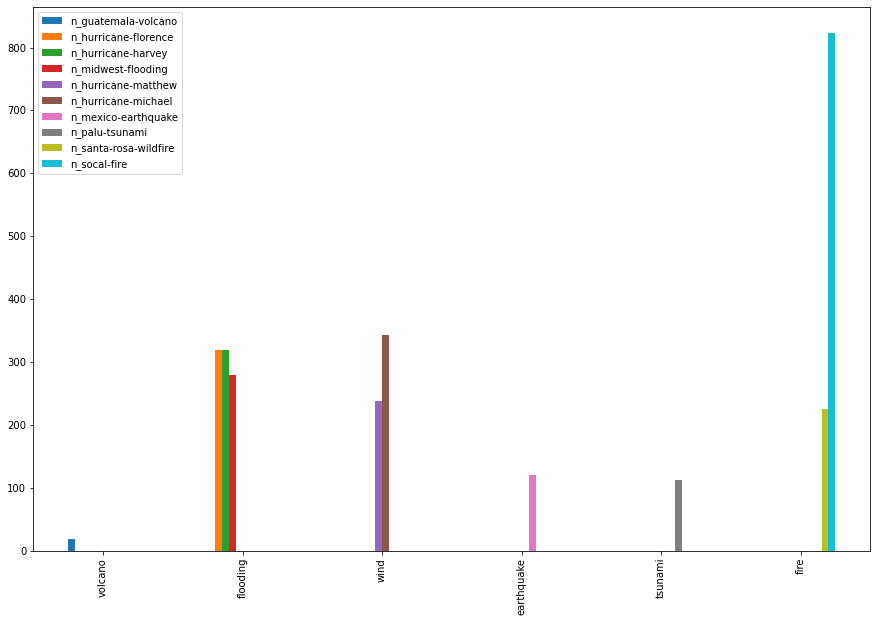

In [25]:
fig = pd.DataFrame(bigDict2).T.plot(kind='bar',figsize=(15, 10))
plt.show()

In [26]:
bigDict3 = copy.deepcopy(bigDict)
for l in list(bigDict3.keys()):
#     del(bigDict3[l]["number"])
    for ll in list(bigDict3[l].keys()):
        if (ll.startswith('f_') | (ll.startswith('d_')) | (ll.startswith('n_'))):
            del(bigDict3[l][ll])
pd.DataFrame(bigDict3)

,volcano,flooding,wind,earthquake,tsunami,fire
number,18,917,581,121,113,1049


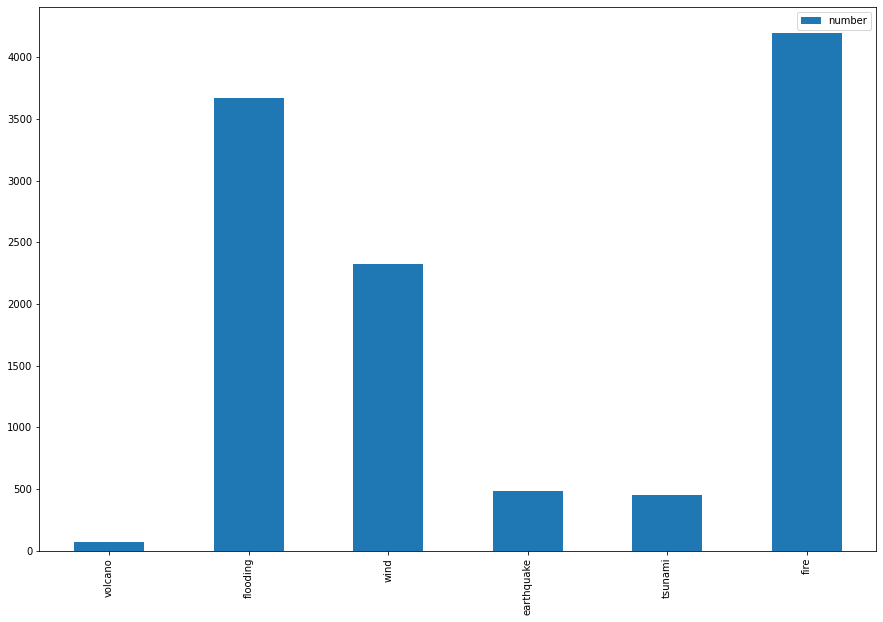

In [33]:
fig = pd.DataFrame(bigDict3).T.plot(kind='bar',figsize=(15, 10))
plt.show()

In [39]:
bigDict4 = copy.deepcopy(bigDict)
for l in list(bigDict4.keys()):
    del(bigDict4[l]["number"])
    for ll in list(bigDict4[l].keys()):
        if (ll.startswith('f_') | (ll.startswith('n_'))):
            del(bigDict4[l][ll])
pd.DataFrame(bigDict4)

,volcano,flooding,wind,earthquake,tsunami,fire
d_no-damage,639,24240,17103,32066,25455,17923
d_minor-damage,9,2944,11755,110,1,161
d_destroyed,25,530,2904,2,4966,4800
d_major-damage,9,9602,3847,18,571,114
d_un-classified,174,900,1016,75,401,427


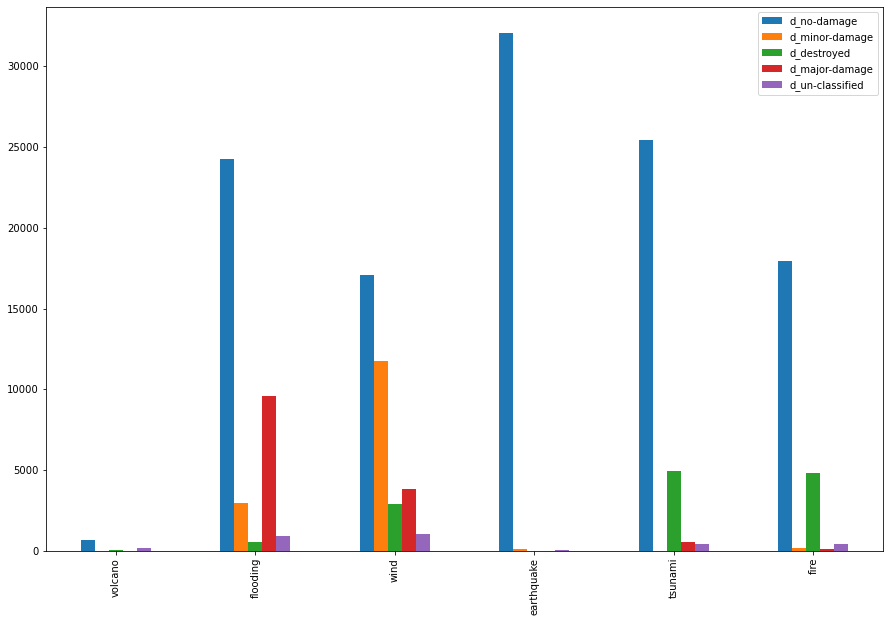

In [40]:
fig = pd.DataFrame(bigDict4).T.plot(kind='bar',figsize=(15, 10))
plt.show()

# Analysis of black pixels (corrupted images)

Big dataset

In [13]:
mypath = r"C:\Users\Luka\Desktop\PFP\geotiffs\hold\images"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
filesToCheck = []

pctOfBlackPixels = []

for file in onlyfiles:
    image = tiff.imread(mypath+"\\"+file)
    pctOfBlackPixels.append(np.sum(np.count_nonzero(image, axis=2)==0)/(1024*1024))
    if ( (np.sum(np.count_nonzero(image, axis=2)==0)/(1024*1024)) > 0.6 ):
        filesToCheck.append(file)

In [17]:
filesToCheck = [f for f in filesToCheck if "_pre" not in f]
filesToCheck

['hurricane-florence_00000220_post_disaster.tif',
 'midwest-flooding_00000341_post_disaster.tif',
 'palu-tsunami_00000031_post_disaster.tif',
 'palu-tsunami_00000052_post_disaster.tif',
 'palu-tsunami_00000055_post_disaster.tif',
 'palu-tsunami_00000075_post_disaster.tif',
 'palu-tsunami_00000080_post_disaster.tif',
 'palu-tsunami_00000116_post_disaster.tif',
 'santa-rosa-wildfire_00000104_post_disaster.tif',
 'santa-rosa-wildfire_00000112_post_disaster.tif',
 'santa-rosa-wildfire_00000335_post_disaster.tif',
 'socal-fire_00000005_post_disaster.tif',
 'socal-fire_00000210_post_disaster.tif',
 'socal-fire_00000479_post_disaster.tif',
 'socal-fire_00000532_post_disaster.tif']

In [27]:
np.mean(pctOfBlackPixels)

0.047248845442826086

In [28]:
np.median(pctOfBlackPixels)

0.0

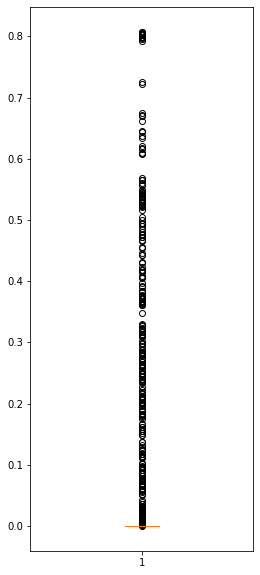

In [29]:
fig = plt.figure(figsize=(4,10))
plt.boxplot(pctOfBlackPixels)
plt.show()

Small dataset with masks

In [25]:
mypath = r"C:\Users\Luka\Desktop\PFP\train\images"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
filesToCheck = []

pctOfBlackPixels = []

for file in onlyfiles:
    image = np.array(Image.open(mypath+"\\"+file))
    pctOfBlackPixels.append(np.sum(np.count_nonzero(image, axis=2)==0)/(1024*1024))
    if ( (np.sum(np.count_nonzero(image, axis=2)==0)/(1024*1024)) > 0.6 ):
        filesToCheck.append(file)

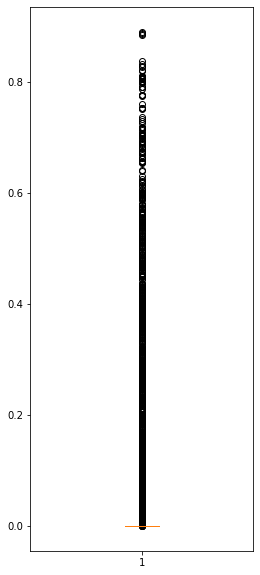

In [32]:
fig = plt.figure(figsize=(4,10))
plt.boxplot(pctOfBlackPixels)
plt.show()

In [ ]:
filesToCheck = [f for f in filesToCheck if "_pre" not in f]
filesToCheck

In [30]:
IMG_PATH = "train/images"
MASK_PATH = "train/targets"
JSON_PATH = "train/labels"

In [ ]:
mypath = r"C:\Users\Luka\Desktop\PFP\train\images"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles = [f.replace(".png","") for f in onlyfiles if "hurricane-harvey" in f]
onlyfiles = [f.replace(".png","") for f in onlyfiles if "_post_" in f]

for file in onlyfiles:
    path_to_image = IMG_PATH+"\\"+"{}.png".format(file)
    path_to_json  = JSON_PATH+"\\"+"{}_coordsList.json".format(file)
    path_to_output = r"imagetests\{}_boxes.png".format(file)
    save_img_coords(path_to_image, path_to_json, path_to_output)

In [31]:
for image in filesToCheck:
    post = IMG_PATH+"/"+image
    mask = MASK_PATH+"/"+image.replace(".png","_target.png")
    
    save_img(post,mask,mask,"blackImages/"+image.replace(".png","_withfiltersblack.png"))

In [18]:
path_to_image = IMG_PATH+"\\"+"guatemala-volcano_00000016_post_disaster.png"
path_to_json  = JSON_PATH+"\\"+"guatemala-volcano_00000016_post_disaster_coordsList.json"
path_to_output = r"imagetests\guatemala-volcano_00000016_post_disaster_boxes.png"

In [45]:
path_to_image = r"C:\Users\Luka\Desktop\PFP\geotiffs\hold\images\hurricane-florence_00000035_post_disaster.tif"
path_to_json = r"C:\Users\Luka\Desktop\PFP\geotiffs\hold\labels\hurricane-florence_00000035_post_disaster_coordsList_Yolo.json"
path_to_output = r"C:\Users\Luka\Desktop\PFP\imagetests\hurricane-florence_00000035_post_disaster_label.png"

In [13]:
save_img_yolo(path_to_image, path_to_json, path_to_output)

In [19]:
save_img_coords(path_to_image, path_to_json, path_to_output)

In [4]:
def save_img_yolo_txt(path_to_image, path_to_txtPred, path_to_output):
    
    # Loading post image
    if '.tif' in path_to_image:
        tif = tiff.imread(path_to_image)
        img = Image.fromarray(tif.astype('uint8'), 'RGB')
    else:
        img = Image.open(path_to_image)
        
    draw = ImageDraw.Draw(img, 'RGBA')
    
    damage_dict = {
        "0": (0, 255, 0, 100),
        "1": (255, 0, 0, 125)
    }
    
    df = pd.read_csv(path_to_txtPred, sep=" ", header=None)
    df.columns = ["Class", "center_x", "center_y", "width", "heigth"]
    df["x1"] = (df["center_x"] - df["width"]/2)*1024
    df["y1"] = (df["center_y"] - df["width"]/2)*1024
    df["x2"] = (df["center_x"] + df["width"]/2)*1024
    df["y2"] = (df["center_y"] + df["width"]/2)*1024
    df = df[["Class","x1","y1","x2","y2"]]
    
    for serie in df.iterrows():
        serie = serie[1] #DF
        x1 = serie["x1"]
        x2 = serie["x2"]
        y1 = serie["y1"]
        y2 = serie["y2"]
        draw.rectangle([x1,y1,x2,y2], fill=damage_dict[str(int(serie["Class"]))], outline=damage_dict[str(int(serie["Class"]))])
        
    img.save(path_to_output)

In [5]:
def save_img_yolo(path_to_image, path_to_json, path_to_output):
    
    # Loading post image
    if '.tif' in path_to_image:
        tif = tiff.imread(path_to_image)
        img = Image.fromarray(tif.astype('uint8'), 'RGB')
    else:
        img = Image.open(path_to_image)
        
    draw = ImageDraw.Draw(img, 'RGBA')
    
    damage_dict = {
        "no-damage": (0, 255, 0, 100),
        "minor-damage": (0, 0, 255, 125),
        "major-damage": (255, 69, 0, 125),
        "destroyed": (255, 0, 0, 125),
        "un-classified": (255, 255, 255, 125)
    }
    
    with open(path_to_json,"r") as mj:
        js = json.load(mj)
        
        for i, building in enumerate(js["features"]["xy"]):
            liste = building["wkt"]
            x1 = liste[0] - (liste[2]/2)
            x2 = liste[0] + (liste[2]/2)
            y1 = liste[1] - (liste[3]/2)
            y2 = liste[1] + (liste[3]/2)
            draw.rectangle([x1,y1,x2,y2], damage_dict[building["properties"]["subtype"]])
    
    img.save(path_to_output)
    

In [6]:
def save_img_coords(path_to_image, path_to_json, path_to_output):
    
    # Loading post image
    if '.tif' in path_to_image:
        tif = tiff.imread(path_to_image)
        img = Image.fromarray(tif.astype('uint8'), 'RGB')
    else:
        img = Image.open(path_to_image)
        
    draw = ImageDraw.Draw(img, 'RGBA')
    
    damage_dict = {
        "no-damage": (0, 255, 0, 100),
        "minor-damage": (0, 0, 255, 125),
        "major-damage": (255, 69, 0, 125),
        "destroyed": (255, 0, 0, 125),
        "un-classified": (255, 255, 255, 125)
    }
    
    with open(path_to_json,"r") as mj:
        js = json.load(mj)
        
        for i, building in enumerate(js["features"]["xy"]):
            listOfList = building["wkt"]
            draw.polygon([item for sublist in listOfList for item in sublist], damage_dict[building["properties"]["subtype"]])
    
    img.save(path_to_output)
    

In [7]:
def save_img(path_to_image, path_to_localization, path_to_damage, path_to_output):
    #https://github.com/ethanweber/xview2
    no_damage_polygons = []
    minor_damage_polygons = []
    major_damage_polygons = []
    destroyed_polygons = []

    # Load the challenge output localization image
    localization = Image.open(path_to_localization)
    loc_arr = np.array(localization)

    # If the localization has damage values convert all non-zero to 1
    # This helps us find where buildings are, and then use the damage file
    # to get the value of the classified damage
    loc_arr = (loc_arr >= 1).astype(np.uint8)

    # Load the challenge output damage image
    damage = Image.open(path_to_damage)
    dmg_arr = np.array(damage)

    # Use the localization to get damage only were they have detected buildings
    mask_arr = dmg_arr*loc_arr
    
    # Get the value of each index put into a dictionary like structure
    shapes = rasterio.features.shapes(mask_arr)
    
    # Iterate through the unique values of the shape files 
    # This is a destructive iterator or else we'd use the pythonic for x in shapes if x blah 
    for shape in shapes:
        if shape[1] == 1:
            no_damage_polygons.append(shapely.geometry.Polygon(shape[0]["coordinates"][0]))
        elif shape[1] == 2:
            minor_damage_polygons.append(shapely.geometry.Polygon(shape[0]["coordinates"][0]))
        elif shape[1] == 3:
            major_damage_polygons.append(shapely.geometry.Polygon(shape[0]["coordinates"][0]))
        elif shape[1] == 4:
            destroyed_polygons.append(shapely.geometry.Polygon(shape[0]["coordinates"][0]))
        elif shape[1] == 0:
            continue
        else:
            print("Found non-conforming damage type: {}".format(shape[1]))
    
    # Loading post image
    img = Image.open(path_to_image) 
    
    draw = ImageDraw.Draw(img, 'RGBA')
    
    damage_dict = {
        "no-damage": (0, 255, 0, 100),
        "minor-damage": (0, 0, 255, 125),
        "major-damage": (255, 69, 0, 125),
        "destroyed": (255, 0, 0, 125),
        "un-classified": (255, 255, 255, 125)
    }
    
    # Go through each list and write it to the post image we just loaded
    for polygon in no_damage_polygons:
        x,y = polygon.exterior.coords.xy
        coords = list(zip(x,y))
        draw.polygon(coords, damage_dict["no-damage"])

    for polygon in minor_damage_polygons:
        x,y = polygon.exterior.coords.xy
        coords = list(zip(x,y))
        draw.polygon(coords, damage_dict["minor-damage"])

    for polygon in major_damage_polygons:
        x,y = polygon.exterior.coords.xy
        coords = list(zip(x,y))
        draw.polygon(coords, damage_dict["major-damage"])

    for polygon in destroyed_polygons:
        x,y = polygon.exterior.coords.xy
        coords = list(zip(x,y))
        draw.polygon(coords, damage_dict["destroyed"])

    img.save(path_to_output)

# Checking differences between big and small datasets and displaying of images

In [62]:
tif = tiff.imread(r"C:\Users\Luka\Desktop\PFP\geotiffs\tier1\images"+"\\"+"hurricane-florence_00000247_post_disaster.tif")
png = Image.open(r"C:\Users\Luka\Desktop\PFP\train\images"+"\\"+"hurricane-florence_00000247_post_disaster.png")

In [63]:
type(tif)

numpy.ndarray

In [67]:
(tif == np.array(png)).sum()

3145728

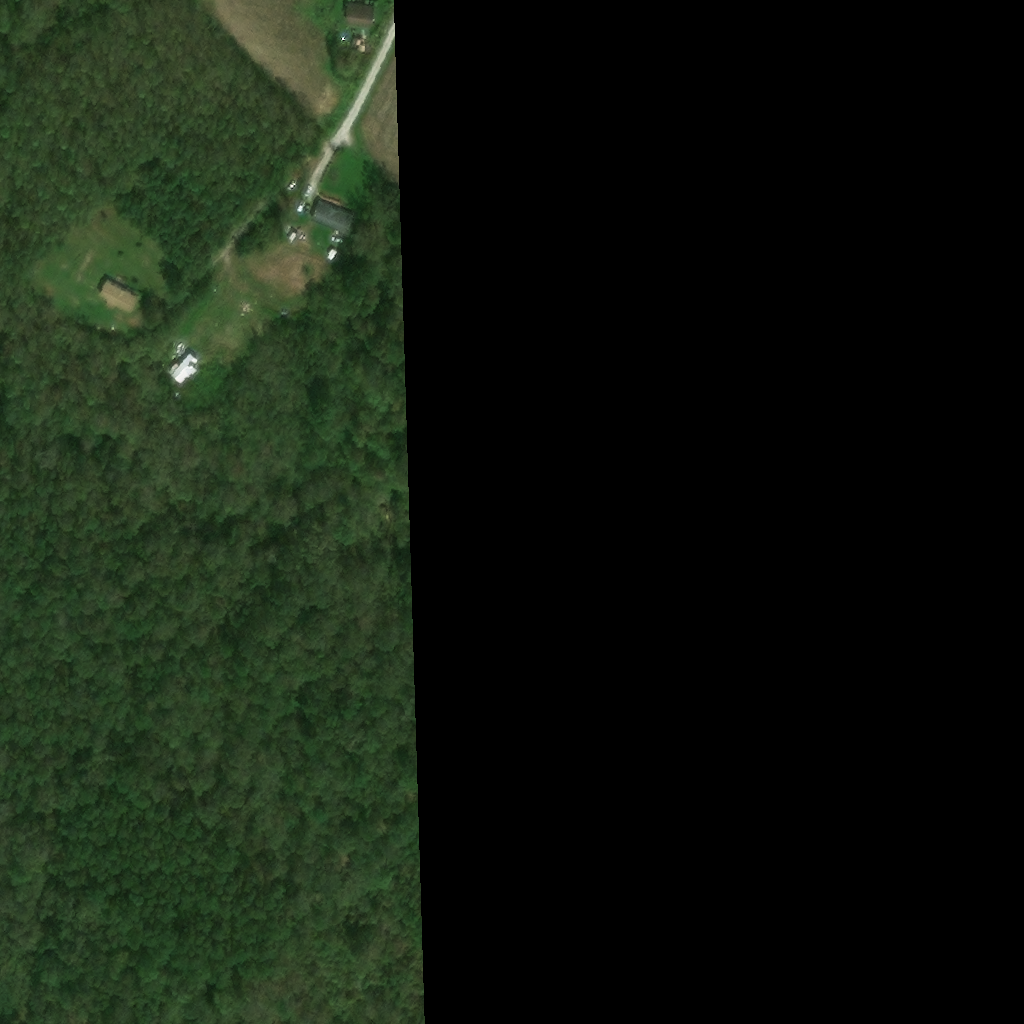

In [64]:
display(Image.fromarray(tif.astype('uint8'), 'RGB'))

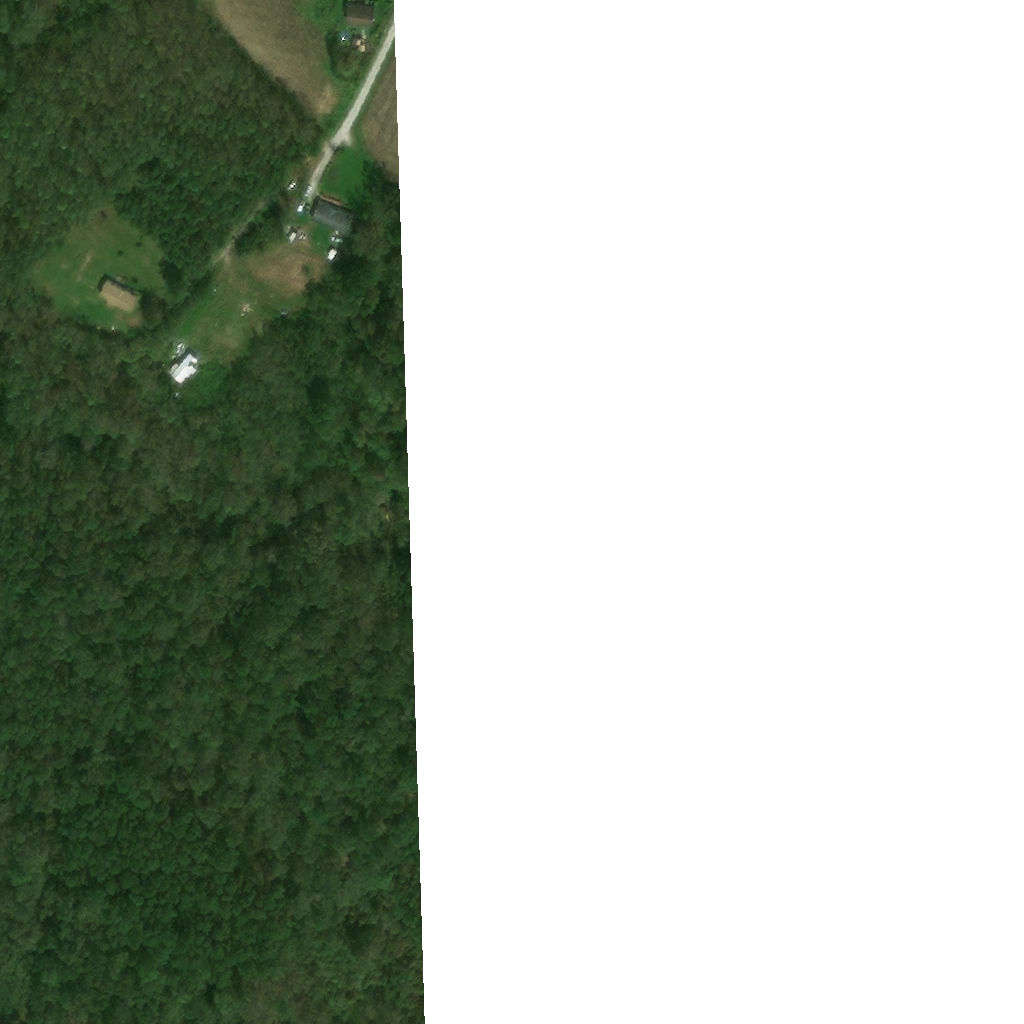

In [65]:
display(png)

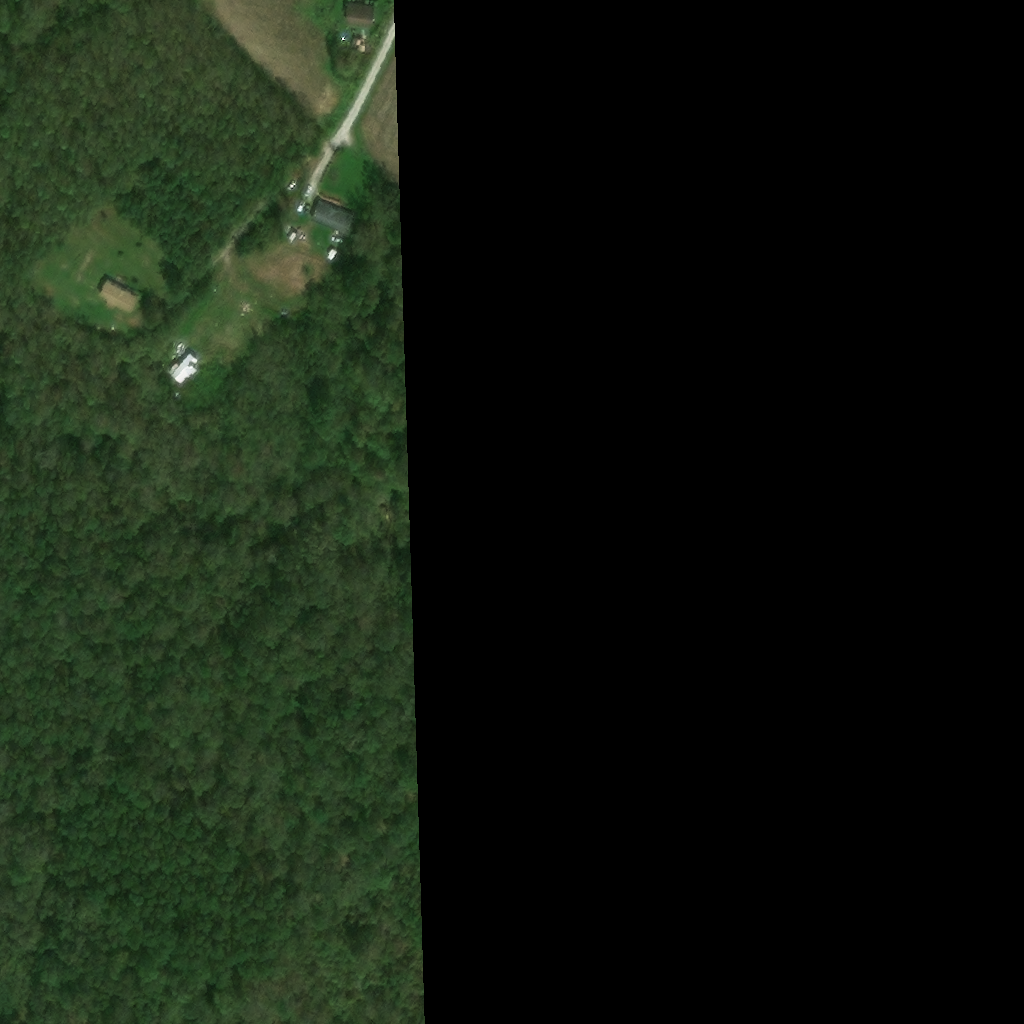

In [66]:
display(Image.fromarray(np.array(png).astype('uint8'), 'RGB'))

### Calculating IOU between pred and test data

In [8]:
def get_iou(bb1, bb2):
    """
    https://stackoverflow.com/questions/25349178/calculating-percentage-of-bounding-box-overlap-for-image-detector-evaluation
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    bb1 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner
    bb2 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner

    Returns
    -------
    float
        in [0, 1]
    """
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [33]:
df = pd.read_csv('preds\\exp2\\labels\\hurricane-matthew_00000298_post_disaster.txt', sep=" ", header=None)
df.columns = ["Class", "center_x", "center_y", "width", "heigth"]
df

,Class,center_x,center_y,width,heigth
0,1,0.694336,0.729004,0.019531,0.018555
1,1,0.406250,0.409180,0.027344,0.023438
2,1,0.395020,0.478516,0.026367,0.025391


In [34]:
df["x1"] = df["center_x"] - df["width"]/2
df["y1"] = df["center_y"] - df["width"]/2
df["x2"] = df["center_x"] + df["width"]/2
df["y2"] = df["center_y"] + df["width"]/2
df = df[["Class","x1","y1","x2","y2"]]
df

,Class,x1,y1,x2,y2
0,1,0.684570,0.719238,0.704102,0.738770
1,1,0.392578,0.395508,0.419922,0.422852
2,1,0.381836,0.465332,0.408204,0.491700


In [35]:
df2 = pd.read_csv('test\\labels\\test4\\hurricane-matthew_00000298_post_disaster.txt', sep=" ", header=None)
df2.columns = ["Class", "center_x", "center_y", "width", "heigth", ""]
df2["x1"] = df2["center_x"] - df2["width"]/2
df2["y1"] = df2["center_y"] - df2["width"]/2
df2["x2"] = df2["center_x"] + df2["width"]/2
df2["y2"] = df2["center_y"] + df2["width"]/2
df2 = df2[["Class","x1","y1","x2","y2"]]
df2

,Class,x1,y1,x2,y2
0,1,0.826368,0.981509,0.838917,0.994058
1,0,0.910129,0.859178,0.929970,0.879019
2,1,0.909924,0.822913,0.924099,0.837088
3,1,0.813894,0.719002,0.828519,0.733627
4,1,0.778353,0.756172,0.791481,0.769300
5,1,0.722245,0.666510,0.735910,0.680176
6,1,0.677787,0.727908,0.690813,0.740934
7,1,0.565481,0.634288,0.581879,0.650686
8,1,0.381188,0.626204,0.399141,0.644157
9,1,0.079640,0.326049,0.099774,0.346183


In [83]:
path_to_image = r"C:\Users\Luka\Desktop\PFP\test\images\hurricane-matthew_00000298_post_disaster.png"
path_to_json = r"C:\Users\Luka\Desktop\PFP\test\labels\hurricane-matthew_00000298_post_disaster_coordsList_Yolo.json"
path_to_output = r"C:\Users\Luka\Desktop\PFP\preds\exp2\hurricane-matthew_00000298_post_disaster_Yolo.png"

In [84]:
save_img_yolo(path_to_image, path_to_json, path_to_output)

In [85]:
path_to_image = r"C:\Users\Luka\Desktop\PFP\test\images\hurricane-matthew_00000298_post_disaster.png"
path_to_json = r"C:\Users\Luka\Desktop\PFP\test\labels\hurricane-matthew_00000298_post_disaster_coordsList.json"
path_to_output = r"C:\Users\Luka\Desktop\PFP\preds\exp2\hurricane-matthew_00000298_post_disaster_Coords.png"

In [86]:
save_img_coords(path_to_image, path_to_json, path_to_output)

In [50]:
path_to_image = r"C:\Users\Luka\Desktop\PFP\test\images\hurricane-matthew_00000298_post_disaster.png"
path_to_mask = r"C:\Users\Luka\Desktop\PFP\test\targets\hurricane-matthew_00000298_post_disaster_target.png"
path_to_output = r"C:\Users\Luka\Desktop\PFP\preds\exp2\hurricane-matthew_00000298_post_disaster_Mask.png"

In [51]:
save_img(path_to_image,path_to_mask,path_to_mask,path_to_output)

In [9]:
def seeResultPred(name, wherePred):
    path_to_image = r"C:\Users\Luka\Desktop\PFP\test\images\{}_post_disaster.png".format(name)
    path_to_txtPred = r"C:\Users\Luka\Desktop\PFP\preds\{}\labels\{}_post_disaster.txt".format(wherePred,name)
    path_to_output1 = r"C:\Users\Luka\Desktop\PFP\preds\exp2\{}_post_disaster_YoloPred.png".format(name)
    
    save_img_yolo_txt(path_to_image, path_to_txtPred, path_to_output1)
    
    path_to_json = r"C:\Users\Luka\Desktop\PFP\test\labels\{}_post_disaster_coordsList_Yolo.json".format(name)
    path_to_output2 = r"C:\Users\Luka\Desktop\PFP\preds\exp2\{}_post_disaster_YoloTrue.png".format(name)
    save_img_yolo(path_to_image, path_to_json, path_to_output2)
    

In [12]:
seeResultPred("hurricane-michael_00000450", "exp7")

In [87]:
foundBuildings = 0
wrongBuildings = 0
missingBuildings = 0

for serie in df.iterrows():
    
    df2["dist1"] = np.sqrt( np.square(serie[1]["x1"]-df2["x1"]) + np.square(serie[1]["y1"]-df2["y1"]) )
    df2["dist2"] = np.sqrt( np.square(serie[1]["x2"]-df2["x2"]) + np.square(serie[1]["y2"]-df2["y2"]) )
    df2["dist"] = df2["dist1"] + df2["dist2"]
    
    closestBuilding = df2[df2['dist']==df2['dist'].min()].iloc[0] #pd.DataFrame of one row, iloc if multiple same distances
    
    rect1 = {"x1":serie[1]["x1"], "x2":serie[1]["x2"], "y1":serie[1]["y1"], "y2":serie[1]["y2"]}
    rect2 = {"x1":closestBuilding["x1"], "x2":closestBuilding["x2"], "y1":closestBuilding["y1"], "y2":closestBuilding["y2"]}
    
    iou = get_iou(rect1, rect2)
    
    if iou == 0:
        wrongBuildings += 1
    else:
        foundBuildings += 1
    
missingBuildings += df2.shape[0] - df.shape[0] + wrongBuildings

print(foundBuildings)
print(wrongBuildings)
print(missingBuildings)

1
2
14


In [140]:
pat = r'.+\\.+\\.+\\(.+)_.+_.+_'
s = 'preds\\exp2\\labels\\hurricane-matthew_00000298_post_disaster.txt'
match = re.search(pat, s)
catastroph = match.group(1)
print(catastroph)

hurricane-matthew


In [141]:
myDict = {}

In [142]:
if catastroph not in myDict.keys():
    myDict[catastroph] = {"foundBuildings":foundBuildings,
                          "wrongBuildings":wrongBuildings,
                          "missingBuildings":missingBuildings}
else:
    myDict[catastroph]["foundBuildings"] += foundBuildings
    myDict[catastroph]["wrongBuildings"] += wrongBuildings
    myDict[catastroph]["missingBuildings"] += missingBuildings

In [143]:
myDict

{'hurricane-matthew': {'foundBuildings': 1,
  'wrongBuildings': 2,
  'missingBuildings': 14}}

In [10]:
def metric1(folderPred, folderToLook, thresholdIou=0):
    
    mypathLook = r"C:\Users\Luka\Desktop\PFP\test\labels\{}".format(folderToLook)
    onlyfilesToLook = [f for f in listdir(mypathLook) if isfile(join(mypathLook, f))]
    
    mypathPred = r"C:\Users\Luka\Desktop\PFP\preds\{}\labels".format(folderPred)
    onlyfiles = [f for f in listdir(mypathPred) if isfile(join(mypathPred, f))]
    onlyfiles = [f for f in onlyfiles if f in onlyfilesToLook]
    
    mypath = r"C:\Users\Luka\Desktop\PFP\test\labels\test4"
    
    myDict = {}
    
    for file in onlyfiles: #parcourir les images pred
        
        #read first file (pred)
        try:
            df = pd.read_csv(mypathPred+"\\"+file, sep=" ", header=None)
            df.columns = ["Class", "center_x", "center_y", "width", "heigth"]
            
        except EmptyDataError: #empty file
            continue
        
        df["x1"] = df["center_x"] - df["width"]/2
        df["y1"] = df["center_y"] - df["width"]/2
        df["x2"] = df["center_x"] + df["width"]/2
        df["y2"] = df["center_y"] + df["width"]/2
        df = df[["Class","x1","y1","x2","y2"]]
        
        #read second file (true)
        try:
            df2 = pd.read_csv(mypath+"\\"+file, sep=" ", header=None)
            df2.columns = ["Class", "center_x", "center_y", "width", "heigth", ""]
            
        except: #if here, there are some preds but nothing should be pred
            pat = r'(.+)_.+_.+_'
            s = file
            match = re.search(pat, s)
            catastroph = match.group(1)
            try:#if not catastroph yet
                myDict[catastroph]["wrongBuildings"] += df.shape[0]
            except:
                myDict[catastroph]["wrongBuildings"] = df.shape[0]
                
            continue
        
#         if ("hurricane-matthew_00000037" in file):
#             pdb.set_trace()
        
        df2["x1"] = df2["center_x"] - df2["width"]/2
        df2["y1"] = df2["center_y"] - df2["width"]/2
        df2["x2"] = df2["center_x"] + df2["width"]/2
        df2["y2"] = df2["center_y"] + df2["width"]/2
        df2 = df2[["Class","x1","y1","x2","y2"]]
        
        foundBuildings = 0
        wrongBuildings = 0
        missingBuildings = 0
        moreBuildings = 0
        
        TP = 0
        FP = 0
        FN = 0
        TN = 0
        
        #starting by setting up more or less preds statistics
        if (df.shape[0]>df2.shape[0]):
            missingBuildings = 0
            moreBuildings = df.shape[0]-df2.shape[0]
        elif (df.shape[0]<df2.shape[0]):
            missingBuildings = df2.shape[0]-df.shape[0]
            moreBuildings = 0
        else:
            missingBuildings = 0
            moreBuildings = 0
            
            
        for serie in df.iterrows():

            df2["dist1"] = np.sqrt( np.square(serie[1]["x1"]-df2["x1"]) + np.square(serie[1]["y1"]-df2["y1"]) )
            df2["dist2"] = np.sqrt( np.square(serie[1]["x2"]-df2["x2"]) + np.square(serie[1]["y2"]-df2["y2"]) )
            df2["dist"] = df2["dist1"] + df2["dist2"]

            closestBuilding = df2[df2['dist']==df2['dist'].min()].iloc[0] #pd.DataFrame of one row, iloc if multiple same distances
            
            #each time select a closest building, delete this building so is linked to just one other pred
            df2.drop(closestBuilding.name, inplace=True) #deleting via index         
            if(df2.empty):
                break
            
            rect1 = {"x1":serie[1]["x1"], "x2":serie[1]["x2"], "y1":serie[1]["y1"], "y2":serie[1]["y2"]}
            rect2 = {"x1":closestBuilding["x1"], "x2":closestBuilding["x2"], "y1":closestBuilding["y1"], "y2":closestBuilding["y2"]}

            iou = get_iou(rect1, rect2)

            if (iou <= thresholdIou):
                wrongBuildings += 1
            else: #on a une superposition (+ ou - en fct de threshold) des deux rectangles --> matrice de confusion custom
                foundBuildings += 1
                
                #on part sur 2 classes -> donc 4 possibilités
                if (serie[1]["Class"]==1):
                    if (closestBuilding["Class"]==1):
                        TP += 1
                    else:
                        FP += 1
                else:
                    if (closestBuilding["Class"]==1):
                        FN += 1
                    else:
                        TN += 1
                
        
        pat = r'(.+)_.+_.+_'
        s = file
        match = re.search(pat, s)
        catastroph = match.group(1)
        
        if catastroph not in myDict.keys():
            myDict[catastroph] = {"foundBuildings":foundBuildings,
                                  "wrongBuildings":wrongBuildings,
                                  "missingBuildings":missingBuildings,
                                  "moreBuildings":moreBuildings,
                                  "TP":TP,"FP":FP,"FN":FN,"TN":TN}
        else:
            myDict[catastroph]["foundBuildings"] += foundBuildings
            myDict[catastroph]["wrongBuildings"] += wrongBuildings
            myDict[catastroph]["missingBuildings"] += missingBuildings
            myDict[catastroph]["moreBuildings"] += moreBuildings
            myDict[catastroph]["TP"] += TP
            myDict[catastroph]["FP"] += FP
            myDict[catastroph]["FN"] += FN
            myDict[catastroph]["TN"] += TN
            
#         if foundBuildings > 200:
#             print(file)
#             print(foundBuildings)
#             print(wrongBuildings)
#             print(missingBuildings)
        
#         if ("hurricane-matthew_00000037" in file):
#             pdb.set_trace()
            
    return myDict

In [49]:
myDict = metric1("exp9", "test9")

In [50]:
pd.DataFrame(myDict)

,santa-rosa-wildfire,socal-fire
foundBuildings,2909,2465
wrongBuildings,917,865
missingBuildings,364,711
moreBuildings,98,144
TP,695,158
FP,20,34
FN,12,23
TN,2182,2250


In [51]:
myDictBuildings = pd.DataFrame(myDict).iloc[:4]
myDictBuildings

,santa-rosa-wildfire,socal-fire
foundBuildings,2909,2465
wrongBuildings,917,865
missingBuildings,364,711
moreBuildings,98,144


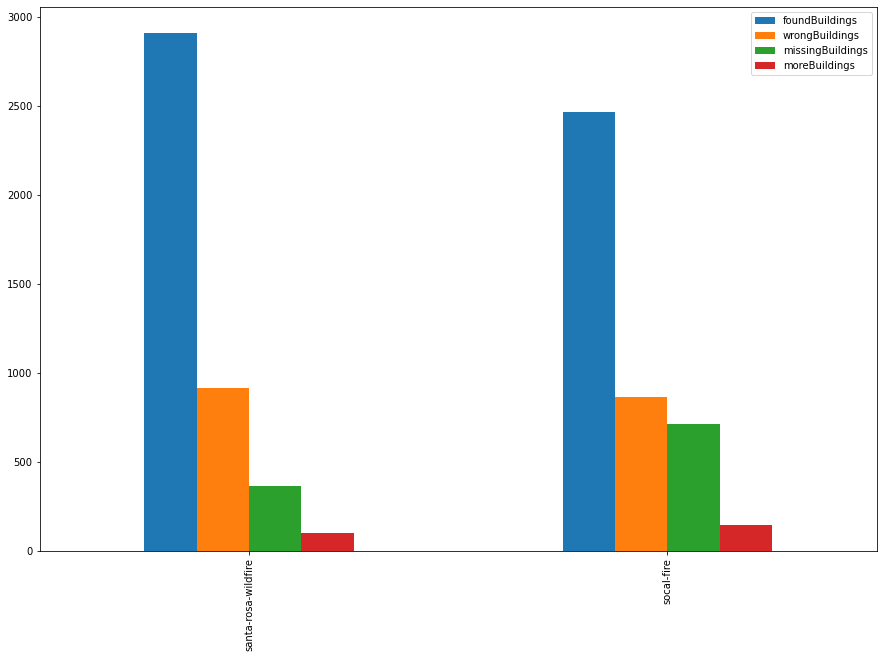

In [52]:
fig = pd.DataFrame(myDictBuildings).T.plot(kind='bar',figsize=(15, 10))
plt.show()

In [53]:
pd.DataFrame(myDict).iloc[4:]

,santa-rosa-wildfire,socal-fire
TP,695,158
FP,20,34
FN,12,23
TN,2182,2250


In [11]:
def showConfusionMatrix(df): #4 rows, TT TF FT and FF, as many columns as disasters
    df["Total"] = df.sum(axis=1)
    for column in df.columns:
        TP = df[column][0]
        FP = df[column][1]
        FN = df[column][2]
        TN = df[column][3]
        print("Disaster name:",column)
        print("Accuracy:", (TP+TN)/(TP+FP+FN+TN))
        print("Recall:", (TP)/(TP+FN)) #amongst real damaged, how much are really damaged
        print("Precision:", (TP)/(TP+FP)) #amongst found damaged, how much are really damaged
        print("Specificity:", (TN)/(TN+FP))
        print("Negative predicted value:", (TN)/(TN+FN)) #amongst found OK, how much are really OK
        #in my opinion, recall need to be as high as possible, like detecting cancer, not that bad if mistake by saying damaged
        #en fait ca dépend de l'utilisation qu'on en fait apres de ces données, si c'est pour assurance alors tout est important, voir essayer de minimiser lol
        print("\n")

In [55]:
showConfusionMatrix(pd.DataFrame(myDict).iloc[4:])

Disaster name: santa-rosa-wildfire
Accuracy: 0.9889996562392575
Recall: 0.983026874115983
Precision: 0.972027972027972
Specificity: 0.9909173478655767
Negative predicted value: 0.9945305378304466


Disaster name: socal-fire
Accuracy: 0.9768762677484787
Recall: 0.8729281767955801
Precision: 0.8229166666666666
Specificity: 0.9851138353765324
Negative predicted value: 0.9898812142542894


Disaster name: Total
Accuracy: 0.9834387793077782
Recall: 0.9605855855855856
Precision: 0.9404630650496141
Specificity: 0.9879625501560411
Negative predicted value: 0.9921647638235953


